In [60]:
import matplotlib.pyplot as mat 
import numpy as np
import cv2

code di atas untuk mengimport library python yaitu numpy, matplotlib.pyplot, dan cv2 dengan penggunaan as untuk merubah panggilan library yang digunakan dengan nama yang sudah ditentukan

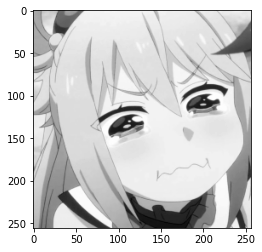

In [61]:
img = cv2.imread ('useless.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
mat.imshow(gray, cmap = "gray")

mengimport dan menampilkan gambar hasil grayscale

In [62]:
sx=np.array([[-1,0,1],
            [-2,0,2],
            [-1,0,1]])
sy=np.array([[1,2,1],
            [0,0,0],
            [-1,-2,-1]])
px=np.array([[-1,0,1],
            [-1,0,1],
            [-1,0,1]])
py=np.array([[1,1,1],
            [0,0,0],
            [-1,-1,-1]])
rx=np.array([[1,0],
             [0,-1]])
ry=np.array([[0,1],
             [-1,0]])

Code diatas merupakan karnel yang akan digunakan, sx dan sy merupakan karnel untuk proses yg menggunakan sobel, pk dan py karnel yang digunakan untuk proses prewit, rx dan ry merupakan karnel yang digunakan untuk proses robert.

In [63]:
def konvolusi (image, kernel): 
    tinggi, lebar = image.shape
    tinggikernel, lebarkernel= kernel.shape 
    x, y = int(tinggikernel/2), int(lebarkernel/2) 

    imgpad =  np.pad(array = image, pad_width = ((x, tinggikernel - 1 - x), (y, lebarkernel - 1 - y)), mode="constant") #gambar dengan padding

    result = np.zeros([tinggi, lebar]) #matriks kosong
    for i in range (tinggi): #perulangan untuk setiap piksel
        for j in range (lebar): 
            for k in range (tinggikernel): #perulangan untuk proses konvolusi
                for l in range (lebarkernel): 
                    result[i,j] += imgpad[i+k, j+l]* kernel[k,l] 
    return result

fungsi di atas merupakan fungsi yang digunakan untuk melakukan proses konvolusi

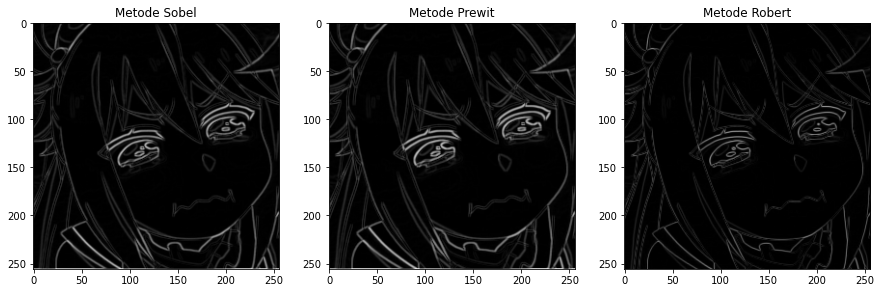

In [64]:
#Hasil Sobel
SX = konvolusi(gray,sx) #konvolusi grayscale dengan kernel sx
SY = konvolusi(gray,sy) #konvolusi grayscale dengan kernel sy
sobel = abs(SX) + abs(SY) #rumus pencarian gradien

#Hasil Prewit
PX = konvolusi(gray,px) #konvolusi grayscale dengan kernel px
PY = konvolusi(gray,py) #konvolusi grayscale dengan kernel py
prewit = abs(PX) + abs(PY) #rumus pencarian gradien 

#Hasil Robert
RX = konvolusi(gray,rx) #konvolusi grayscale dengan kernel rx
RY = konvolusi(gray,ry) #konvolusi grayscale dengan kernel ry
robert = abs(RX) + abs(RY) #rumus percarian gradien
# menampilkan image
mat.figure(figsize=(15,15))
mat.subplot(1,3,1)
mat.title("Metode Sobel")
mat.imshow(sobel, cmap='gray')

mat.subplot(1,3,2)
mat.title("Metode Prewit")
mat.imshow(prewit, cmap='gray')

mat.subplot(1,3,3)
mat.title("Metode Robert")
mat.imshow(robert, cmap='gray')


hasil citra dari deteksi tepi dengan menggunakan metode Sobel di atas terlihat bahwa garis pada setiap sisi gambar lebih tajam serta garis vertical dan horizontal pada setiap sudut gambarterlihat jelas.

hasil citra dari deteksi tepi dengan menggunakan metode Prewitt di atas terlihat bahwa tepinya tebal dan jelas serta garis vertical dan horizontal pada bagian dalam citra juga terlihat cukup jelas, walaupun masih terdapat garis putus-putus.

hasil citra dari deteksi tepi dengan menggunakan metode robert di atas terlihat bahwa tepi dari citra tipis dan kurang tajam serta garis vertical dan horizontal di bagian dalam citra juga kurang jelas.

Kesimpulannya, metode sobel merupakan metode yang paling bagus karena memiliki garis horizontal dan vertikal yang jelas dan tajam. selain itu juga array dari ketiga gambar dapat dilihat bahwa metode sobel memiliki nilai array yang lebih besar dari metode lainnya. hal ini menunjukkan bahwa metode sobel memiliki garis - garis yg lebih jelas dan tajam dibandingkan dengan metode lainnya.